In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

**Setup**

(720, 1280, 3)


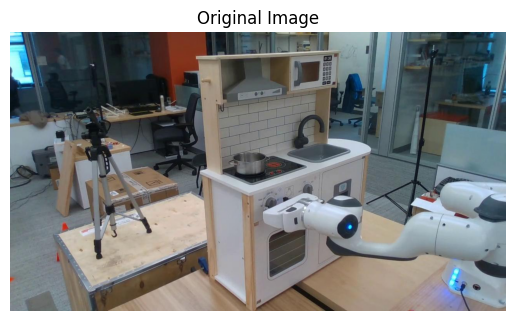

In [5]:
img = np.array(Image.open("rgb.jpeg"))
plt.imshow(img)
plt.axis(False)
plt.title("Original Image")
print(img.shape)

In [6]:
array = img.reshape(-1, 3)
freq_table = []
for i in range(256):
    freq_table.append(0)
for pixel in array:
    freq_table[pixel[0]] += 1
    freq_table[pixel[1]] += 1
    freq_table[pixel[2]] += 1
freq_table=np.array(freq_table)

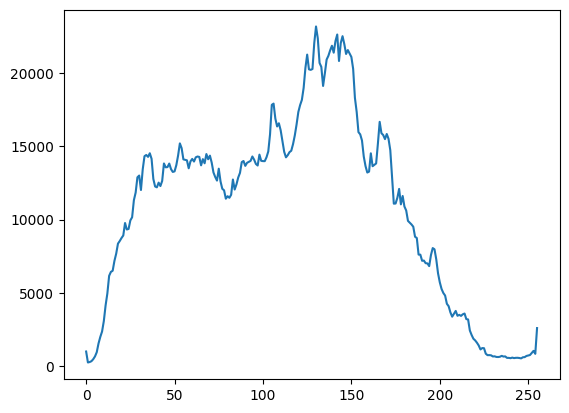

In [7]:
plt.plot(freq_table)

In [9]:
print(freq_table)

[  992   244   275   332   467   657   944  1542  1988  2356  3071  4139
  4960  6160  6430  6507  7181  7678  8360  8538  8743  8916  9768  9325
  9362  9946 10160 11327 11846 12889 13008 12022 13433 14332 14412 14285
 14531 14152 12777 12261 12204 12525 12291 12641 13834 13571 13586 13827
 13446 13255 13294 13719 14376 15205 14879 14114 14084 14048 13504 13977
 14144 13965 14254 14309 14279 13706 14130 13846 14477 14122 14368 13895
 13221 12910 12664 13477 12606 12104 12001 11428 11598 11489 11694 12737
 12053 12403 12873 13192 13925 14003 13670 13878 13943 14011 14311 14095
 13800 13694 14437 14015 13994 13992 14256 14652 15829 17838 17921 16899
 16361 16579 16104 15361 14631 14253 14399 14607 14703 15152 15749 16494
 17348 17819 18174 18994 20353 21267 20262 20225 20285 22048 23188 22378
 20699 20426 19127 19989 20929 21186 21560 21871 21398 22191 22638 20831
 22059 22526 21986 21310 21577 21341 21104 20292 18313 17348 15974 15819
 15400 14306 13651 13213 13278 14526 13646 13738 13

**Helper Functions**

In [214]:
def average_between(min_val, max_val, freq_table):
    sum = 0
    count = 0
    for i in range(min_val,max_val+1):
        sum += freq_table[i]*i
        count += freq_table[i]
    return round(sum/count)

**Gradients**

In [245]:
def iterate_x(x, y):
    for i in range(1,len(x)-1):
        x[i] = round((y[i-1]+y[i])/2)

In [246]:
def iterate_y(x, y, freq_table):
    for i in range(len(y)):
        y[i] = round(average_between(x[i],x[i+1],freq_table))

In [10]:
BITS_PER_PIXEL = 5
NUM_LEVELS = 2**BITS_PER_PIXEL
x = [] # size NUM_LEVELS-1
for i in range(1,NUM_LEVELS):
    x.append(round(i*(255/NUM_LEVELS)))
x = np.block([0,np.array(x),255])
y = np.zeros(NUM_LEVELS)

In [11]:
print(x)

[  0   8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128 135
 143 151 159 167 175 183 191 199 207 215 223 231 239 247 255]


In [12]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [318]:
iterate_y(x,y,freq_table)
iterate_x(x,y)

In [313]:
def quantize(x,y,img):
    for i in range(len(x)-1):
        img[(img >= x[i]) & (img <= x[i+1])] = y[i]
    return img

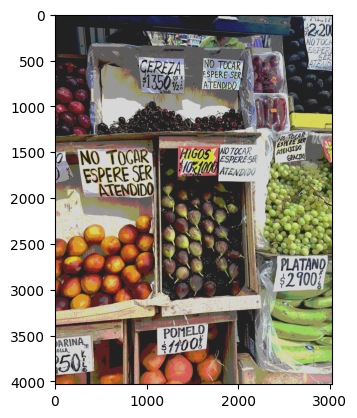

In [314]:
plt.imshow(img)

In [316]:
img = quantize(x,y,img)

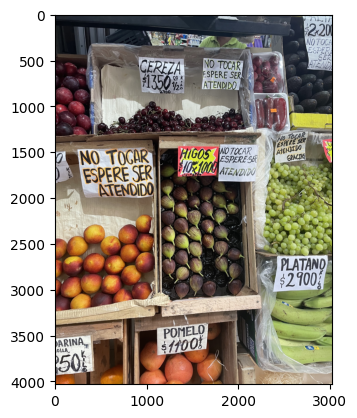

In [317]:
plt.imshow(img)

In [ ]:

array = img.reshape(-1, 3)
freq_table = []
for i in range(256):
    freq_table.append(0)
for pixel in array:
    freq_table[pixel[0]] += 1
    freq_table[pixel[1]] += 1
    freq_table[pixel[2]] += 1
freq_table=np.array(freq_table)

def average_between(min_val, max_val, freq_table):
    sum = 0
    count = 0
    for i in range(min_val,max_val+1):
        sum += freq_table[i]*i
        count += freq_table[i]
    return round(sum/count)

def iterate_x(x, y):
    for i in range(1,len(x)-1):
        x[i] = round((y[i-1]+y[i])/2)

def iterate_y(x, y, freq_table):
    for i in range(len(y)):
        y[i] = round(average_between(x[i],x[i+1],freq_table))

# initial x and y 
BITS_PER_PIXEL = 9
NUM_LEVELS = 2**BITS_PER_PIXEL
x = [] # size NUM_LEVELS-1
for i in range(1,NUM_LEVELS):
    x.append(round(i*(255/NUM_LEVELS)))
x = np.block([0,np.array(x),255])
y = np.zeros(NUM_LEVELS)

for i in range(50):
    iterate_y(x,y,freq_table)
    iterate_x(x,y)

def quantize(x,y,img):
    for i in range(len(x)-1):
        img[(img >= x[i]) & (img <= x[i+1])] = y[i]
    return img